In [1]:
pip install fastai -U

Requirement already up-to-date: fastai in /usr/local/lib/python3.6/dist-packages (2.0.10)


In [2]:
import fastai
fastai.__version__

'2.0.10'

In [5]:
from fastai.vision.all import *
path = untar_data(URLs.IMAGENETTE)

In [14]:
path.ls()

(#2) [Path('/root/.fastai/data/imagenette2/val'),Path('/root/.fastai/data/imagenette2/train')]

In [15]:
dblock = DataBlock(blocks=(ImageBlock(), CategoryBlock()),
                   get_items=get_image_files,
                   get_y=parent_label,
                   item_tfms=Resize(460),
                   batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = dblock.dataloaders(path)

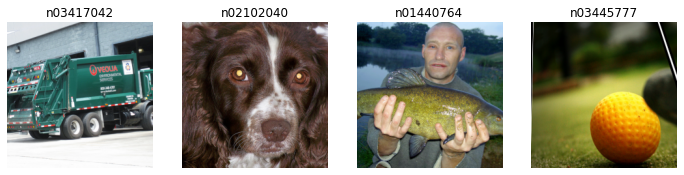

In [19]:
dls.show_batch(max_n=4, nrows=1)

In [20]:
model = resnet50()
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)
learn.fit_one_cycle(5, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.056591,2.621607,0.252427,03:03
1,1.557261,1.559886,0.487304,03:01
2,1.225693,2.155742,0.482450,03:02
3,0.972813,1.026888,0.670276,03:01
4,0.785744,0.674953,0.788648,03:01


In [21]:
x = dls.one_batch()

In [32]:
x[0].mean(dim=[0,2,3]), x[0].std(dim=[0,2,3])

(TensorImage([0.4592, 0.4349, 0.4030], device='cuda:0'),
 TensorImage([0.2819, 0.2765, 0.3001], device='cuda:0'))

In [33]:
def get_dls(bs, size):
    dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   get_y=parent_label,
                   item_tfms=Resize(460),
                   batch_tfms=[*aug_transforms(size=size, min_scale=0.75),
                               Normalize.from_stats(*imagenet_stats)])
    
    return dblock.dataloaders(path, bs=bs)


In [34]:
dls_norm = get_dls(64, 224)
x_ = dls_norm.one_batch()

In [36]:
x_[0].mean(dim=[0,2,3]), x_[0].std(dim=[0,2,3])

(TensorImage([-0.0927,  0.0639,  0.1096], device='cuda:0'),
 TensorImage([1.2108, 1.2191, 1.3309], device='cuda:0'))

In [37]:
model = resnet50()
learn = Learner(dls_norm, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)
learn.fit_one_cycle(5, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.060882,2.259120,0.373786,03:00
1,1.538309,1.455379,0.547423,03:01
2,1.255016,1.397341,0.567588,03:01
3,1.001263,0.926823,0.706497,03:01
4,0.774611,0.688161,0.774085,03:01


In [38]:
dls = get_dls(128, 128)
learn = Learner(dls, resnet50(), loss_func=CrossEntropyLossFlat(),
                metrics=accuracy)
learn.fit_one_cycle(4, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.278881,3.108599,0.332338,02:12
1,1.609328,1.949076,0.443241,02:12
2,1.241144,1.043155,0.649739,02:12
3,0.974378,0.824072,0.742345,02:12


In [39]:
learn.dls = get_dls(64, 224)
learn.fine_tune(5, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.218044,18.954823,0.194175,03:00


epoch,train_loss,valid_loss,accuracy,time
0,0.913029,0.910236,0.711352,03:00
1,0.859502,1.081477,0.646004,03:00
2,0.757884,0.684252,0.782300,03:00
3,0.609564,0.569253,0.819642,03:00
4,0.505004,0.505193,0.842046,03:00
